In [66]:
import pandas as pd
import matplotlib.pyplot as mp
import sklearn as sk
import numpy as np
from pandas .plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# IDEES/TODO
- choisir le modele de sklearn et tester plusieurs

- changer colonnes date par une colonne durée ou la rajouter
- retirer les colonnes : ID, store, PUID, DOID, FARE, PAYTYPE, TIP, TOLLS, IMPROVEMENT
- retirer les lignes avec des valeurs manquantes
- retirer les lignes avec des valeurs aberrantes
- retirer les lignes avec des valeurs négatives
- retirer les lignes avec des valeurs nulles
- diminuer le nombre de lignes ? 


https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf


In [67]:
data = pd.read_parquet("./yellow_tripdata_2022-11.parquet", engine="fastparquet")
print(data.shape)
data.head(5)


(3252717, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-11-01 00:51:22,2022-11-01 00:56:24,1.0,0.6,1.0,N,151,151,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,0.0,0.0
1,1,2022-11-01 00:39:43,2022-11-01 00:48:44,0.0,1.8,1.0,N,90,79,1,8.5,3.0,0.5,3.05,0.0,0.3,15.35,2.5,0.0
2,1,2022-11-01 00:55:01,2022-11-01 01:01:35,0.0,2.0,1.0,N,137,141,1,8.0,3.0,0.5,2.36,0.0,0.3,14.16,2.5,0.0
3,1,2022-11-01 00:24:49,2022-11-01 00:31:04,2.0,1.0,1.0,N,158,113,1,6.0,3.0,0.5,0.00,0.0,0.3,9.80,2.5,0.0
4,1,2022-11-01 00:37:32,2022-11-01 00:42:23,2.0,0.8,1.0,N,249,158,2,5.5,3.0,0.5,0.00,0.0,0.3,9.30,2.5,0.0


In [68]:
#describe with normal notation
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
VendorID,3252717.0,1.778041,0.447742,1.00,2.00,2.00,2.00,6.00
passenger_count,3130759.0,1.392939,0.933150,0.00,1.00,1.00,1.00,9.00
trip_distance,3252717.0,6.346792,654.688940,0.00,1.10,1.89,3.59,305756.36
RatecodeID,3130759.0,1.367043,5.203415,1.00,1.00,1.00,1.00,99.00
PULocationID,3252717.0,166.304893,64.684641,1.00,132.00,162.00,234.00,265.00
DOLocationID,3252717.0,163.840763,69.784166,1.00,114.00,162.00,234.00,265.00
payment_type,3252717.0,1.186218,0.543390,0.00,1.00,1.00,1.00,5.00
fare_amount,3252717.0,15.159421,14.564263,-1274.00,7.00,10.50,17.00,1274.00
extra,3252717.0,0.834000,1.152385,-5.50,0.00,0.50,1.00,14.35
mta_tax,3252717.0,0.486834,0.100948,-0.50,0.50,0.50,0.50,16.55


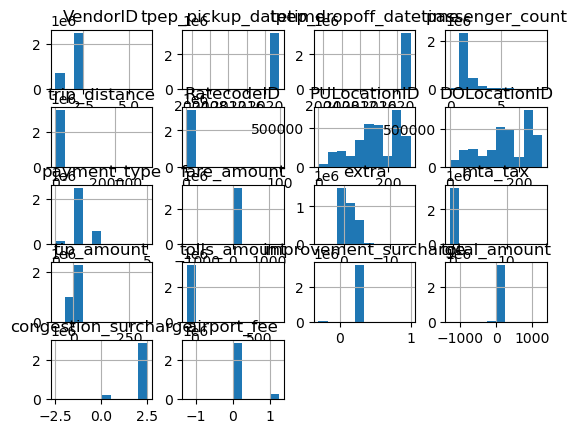

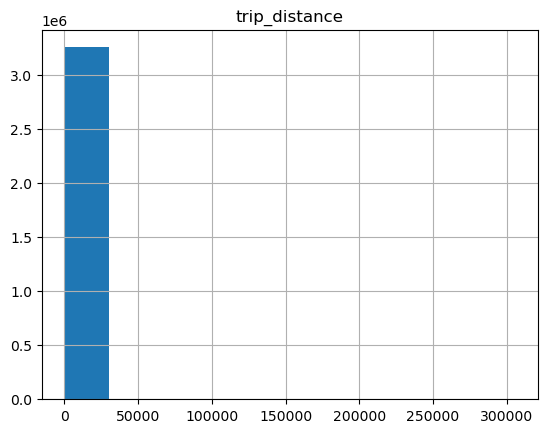

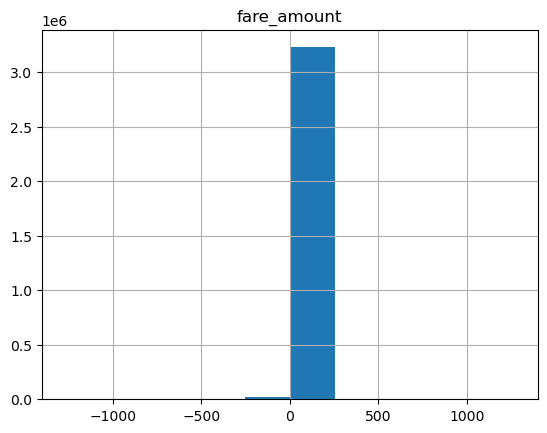

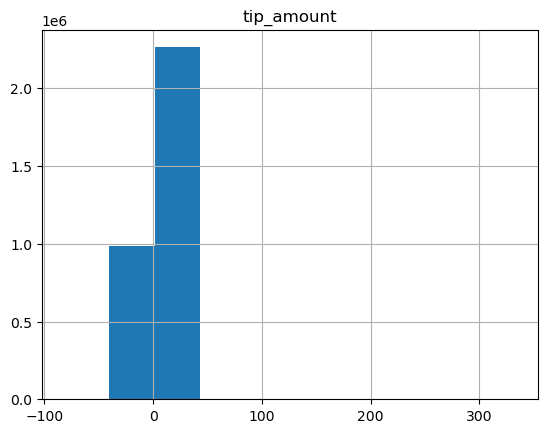

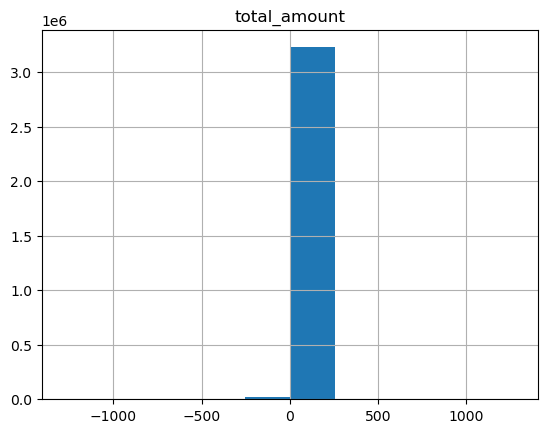

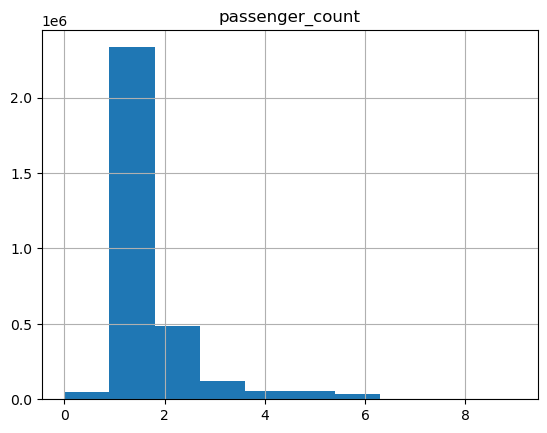

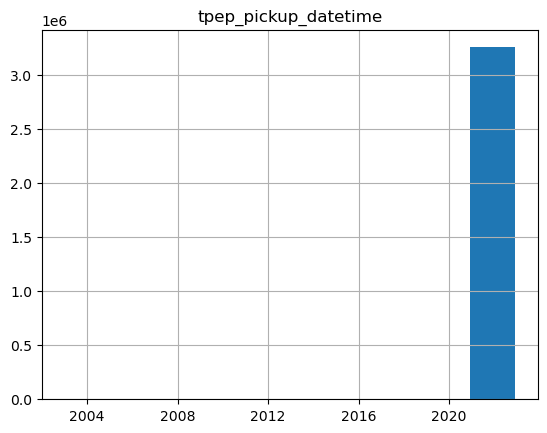

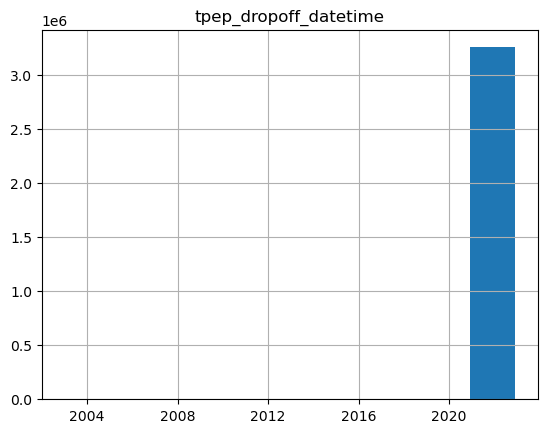

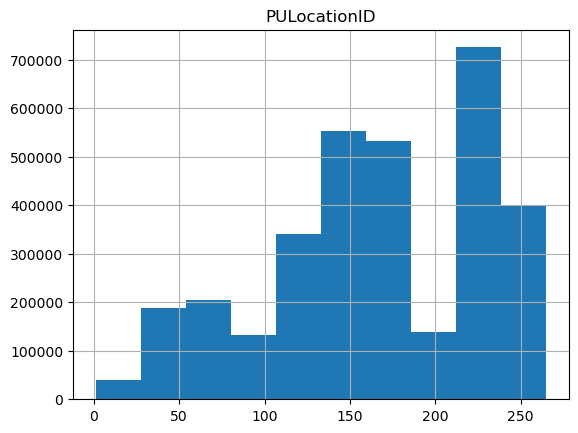

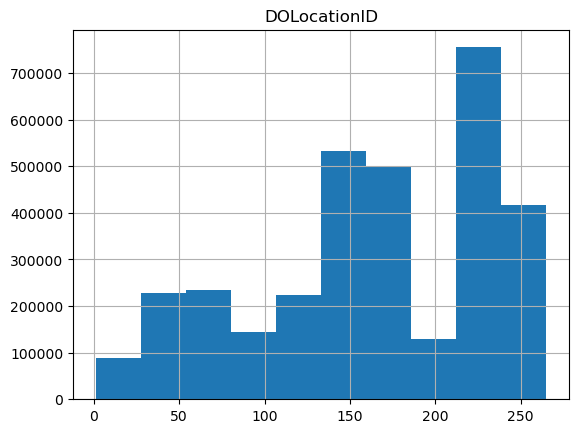

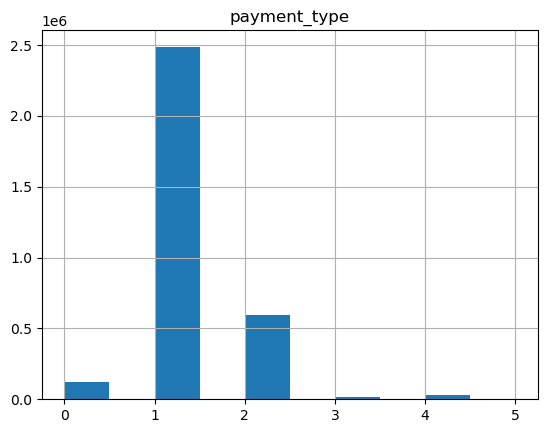

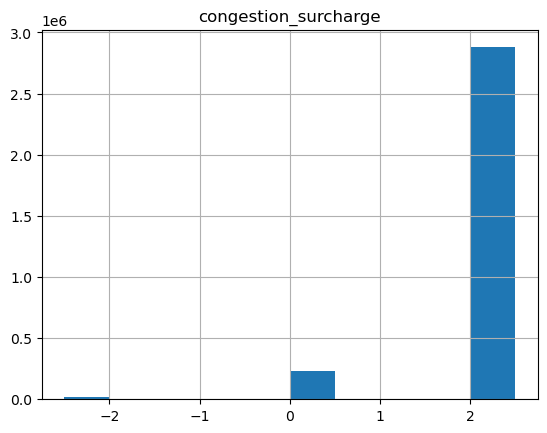

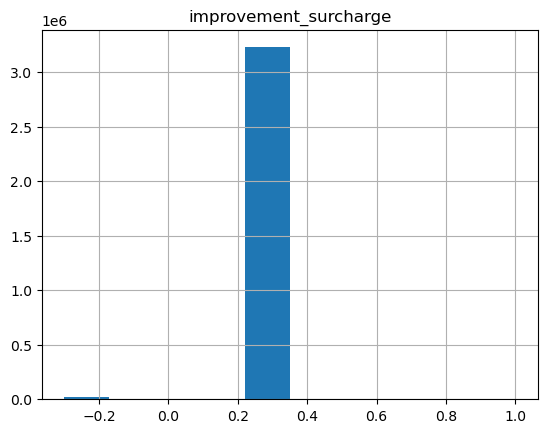

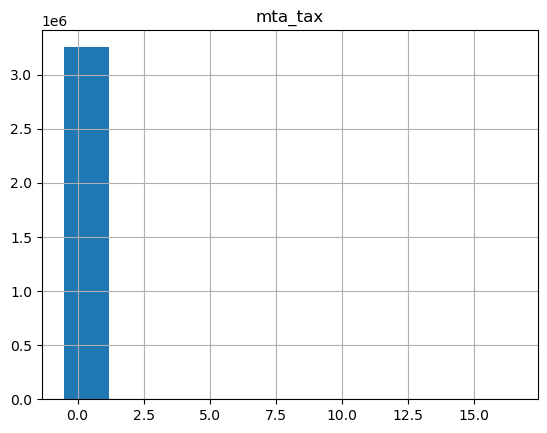

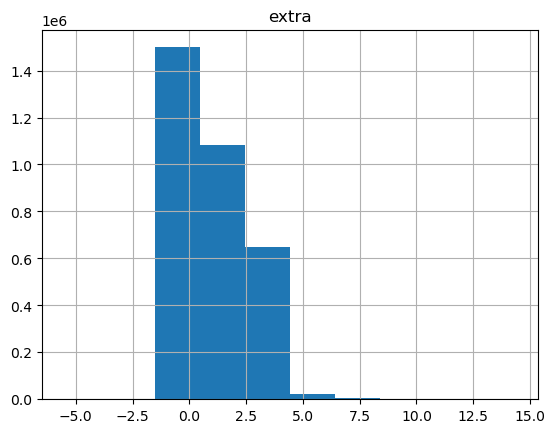

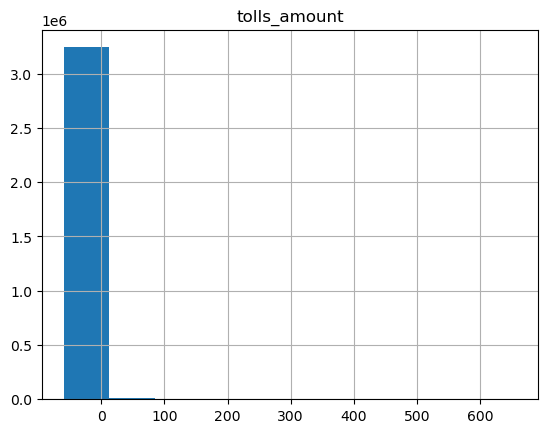

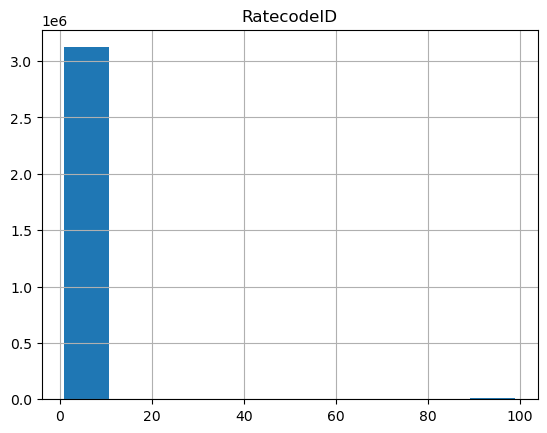

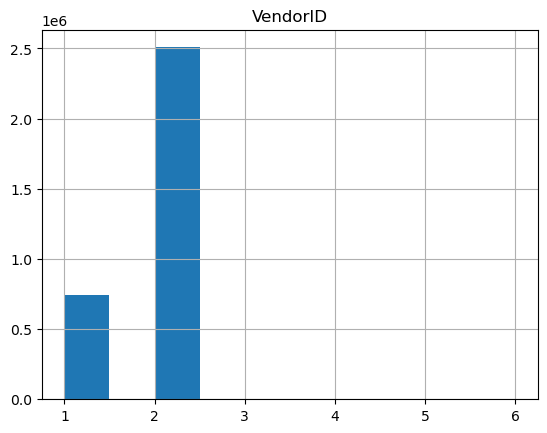

In [69]:

data.hist()
#split into 3 plots for better visualization

data.hist(column='trip_distance')
data.hist(column='fare_amount')
data.hist(column='tip_amount')
data.hist(column='total_amount')
data.hist(column='passenger_count')
data.hist(column='tpep_pickup_datetime')
data.hist(column='tpep_dropoff_datetime')
data.hist(column='PULocationID')
data.hist(column='DOLocationID')
data.hist(column='payment_type')
data.hist(column='congestion_surcharge')
data.hist(column='improvement_surcharge')
data.hist(column='mta_tax')
data.hist(column='extra')
data.hist(column='tolls_amount')
data.hist(column='RatecodeID')
data.hist(column='VendorID')



mp.show()

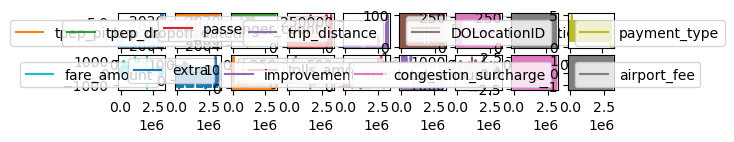

<Figure size 10000x10000 with 0 Axes>

In [70]:
data.plot( subplots=True, layout=(9,9), sharex=False, sharey=False)
mp.figure( figsize=(100,100))
mp.show()
# TODO make readable

In [115]:
# adapt data to be used in the model
dataTrimmed = data.drop(columns=['VendorID', 'store_and_fwd_flag', 'RatecodeID','PULocationID','DOLocationID', 'payment_type','fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge','airport_fee','tip_amount','passenger_count'])
 

In [116]:
#change dates to duration and hour
for index, row in dataTrimmed.iterrows():
    start = row['tpep_pickup_datetime']
    end = row['tpep_dropoff_datetime']
    duration = end - start
    #add duration to the dataframe
    dataTrimmed.at[index, 'duration'] = duration.seconds
    #get the starting hour of the trip
    dataTrimmed.at[index, 'hour'] = start.hour

    #dataTrimmed = dataTrimmed.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
dataTrimmed.head(5)

# KeyError                                  Traceback (most recent call last)
# ~\AppData\Local\Temp\ipykernel_9092\2768915050.py in 
#       2 #change dates to duration and hour
#       3 for index, row in data.iterrows():
# ----> 4     start = row['tpep_pickup_datetime']
#       5     end = row['tpep_dropoff_datetime']
# ...
# -> 3804                 raise KeyError(key) from err
#    3805             except TypeError:
#    3806                 # If we have a listlike key, _check_indexing_error will raise

# KeyError: 'tpep_pickup_datetime'

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,total_amount,duration,hour
0,2022-11-01 00:51:22,2022-11-01 00:56:24,0.6,5.80,302.0,0.0
1,2022-11-01 00:39:43,2022-11-01 00:48:44,1.8,15.35,541.0,0.0
2,2022-11-01 00:55:01,2022-11-01 01:01:35,2.0,14.16,394.0,0.0
3,2022-11-01 00:24:49,2022-11-01 00:31:04,1.0,9.80,375.0,0.0
4,2022-11-01 00:37:32,2022-11-01 00:42:23,0.8,9.30,291.0,0.0


In [117]:
# linear regression with only time and distance

#split data into train and test sets
array = dataTrimmed.values
#X is duration
X = dataTrimmed[['trip_distance']]
#Y is distance
Y = dataTrimmed[['duration']]

print(X.head(5))
print(Y.head(5))

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=1)


model = LinearRegression()



   trip_distance
0            0.6
1            1.8
2            2.0
3            1.0
4            0.8
   duration
0     302.0
1     541.0
2     394.0
3     375.0
4     291.0


,count,mean,std,min,25%,50%,75%,max
trip_distance,3252717.0,6.346792,654.688940,0.0,1.10,1.89,3.59,305756.36
total_amount,3252717.0,22.069939,18.221865,-1277.8,12.36,16.30,23.76,1277.80
duration,3252717.0,1127.840844,3445.639026,0.0,471.00,782.00,1265.00,86399.00
hour,3252717.0,14.253862,5.720042,0.0,11.00,15.00,19.00,23.00


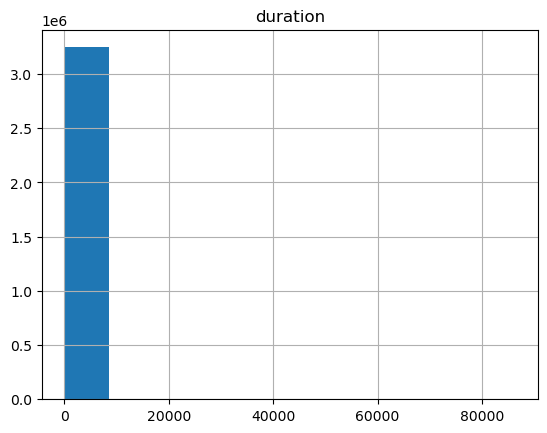

In [118]:
dataTrimmed.hist(column="duration")
dataTrimmed.describe().transpose()

<AxesSubplot:xlabel='trip_distance', ylabel='duration'>

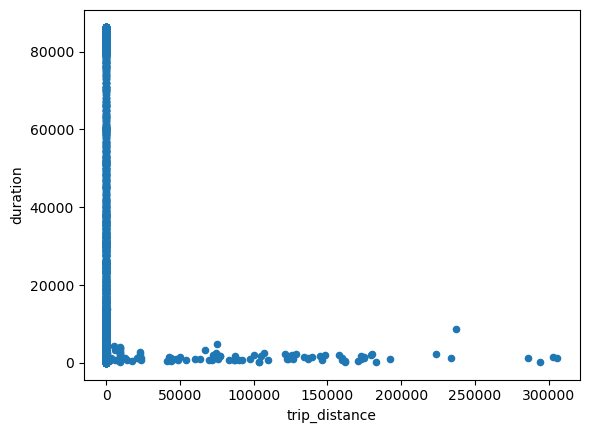

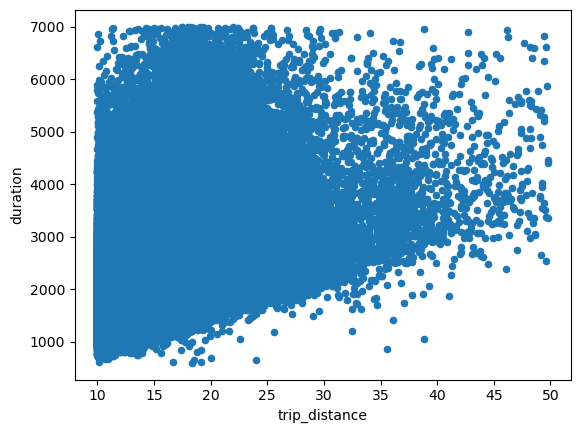

In [119]:
dataTrimmed= dataTrimmed.dropna()
dataTrimmed.plot.scatter(x='trip_distance', y='duration')
#remove null values
dataTrimmed = dataTrimmed[dataTrimmed.duration >= 600]
dataTrimmed = dataTrimmed[dataTrimmed.duration < 7000]
dataTrimmed = dataTrimmed[dataTrimmed.trip_distance >= 10]
dataTrimmed = dataTrimmed[dataTrimmed.trip_distance < 50]

dataTrimmed.plot.scatter(x='trip_distance', y='duration')

R^2:  1.285451234345203e-08
Intercept:  [1129.89543594]
Slope:  [[0.00786384]]
Mean squared error: 11123526.04
Variance score: 0.00


d:\apps\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- duration
Feature names seen at fit time, yet now missing:
- trip_distance

  warnings.warn(message, FutureWarning)
d:\apps\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


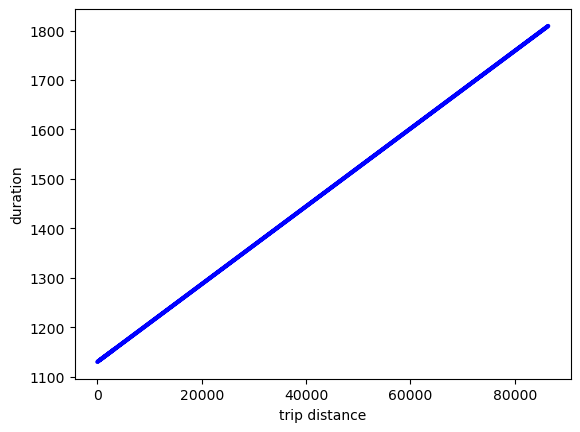

In [120]:
model = model.fit(X_train, Y_train)
predictions = model.predict(Y_test)

#results
print("R^2: ", model.score(X_test, Y_test))
print("Intercept: ", model.intercept_)
print("Slope: ", model.coef_)
print("Mean squared error: %.2f" % np.mean((predictions - Y_test) ** 2))
print("Variance score: %.2f" % model.score(X_test, Y_test))


mp.plot(Y_test, predictions, color='blue', linewidth=3)

mp.xlabel('trip distance')
mp.ylabel('duration')

mp.show()

In [121]:
print(predictions)
print(X_test)

[[1153.85654995]
 [1139.05680707]
 [1131.00423708]
 ...
 [1132.92301352]
 [1138.44342771]
 [1135.29002872]]
         trip_distance
2384372           3.33
733075            3.61
2432148           0.37
1662743           1.97
1058224           3.06
...                ...
629015            0.85
1202998           0.00
3135692           2.65
572087            3.60
1288618           0.42

[813180 rows x 1 columns]


In [122]:
# linear regression with time hour and distance

#split data into 24 sets by hour


#split data into train and test sets
array = data.values
#X is duration
X = array[
#Y 
Y = array[
Y = np.append(Y, array[


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=1)
print( array )




SyntaxError: invalid syntax (2721305076.py, line 11)

In [ ]:
#linear regression with more parameters

#split data into train and test sets
array = data.values
#X is duration
X = array[
#Y is everything else
Y = array[
Y = np.append(Y,


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=1)
print( array )
